# Análise em tempo discreto

### Questão 1 
Implemente um programa para calcular os 100 primeiros termos da sequência de Fibonacci e plote o resultado usando a função stem.

In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

$y[k] = y[k − 1] + y[k − 2], y[0] = 0; y[1] = 1$

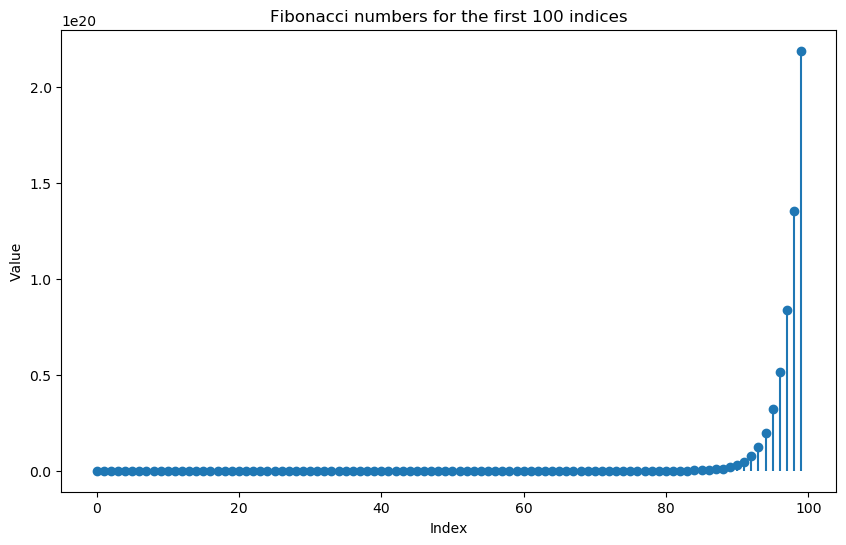

In [2]:
# Fibonacci sequence generator
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

# Generate the first 100 Fibonacci numbers
fib = list(fibonacci(100))

# Plot the Fibonacci numbers with the stem plot
plt.figure(figsize=(10, 6))
plt.stem(fib, basefmt=' ', use_line_collection=True)
plt.title('Fibonacci numbers for the first 100 indices')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

### Questão 2  
Construa os seguintes sinais em tempo discreto (plote usando stem):

(a) Degrau unitário;
(b) Retangulo unitário de janela 5;
(c) Impulso unitário;
(d) Seno (T = 0.5s);
(e) Sinc (seno normalizado);
(f) Exponencial decrescente (T = 0.5s);

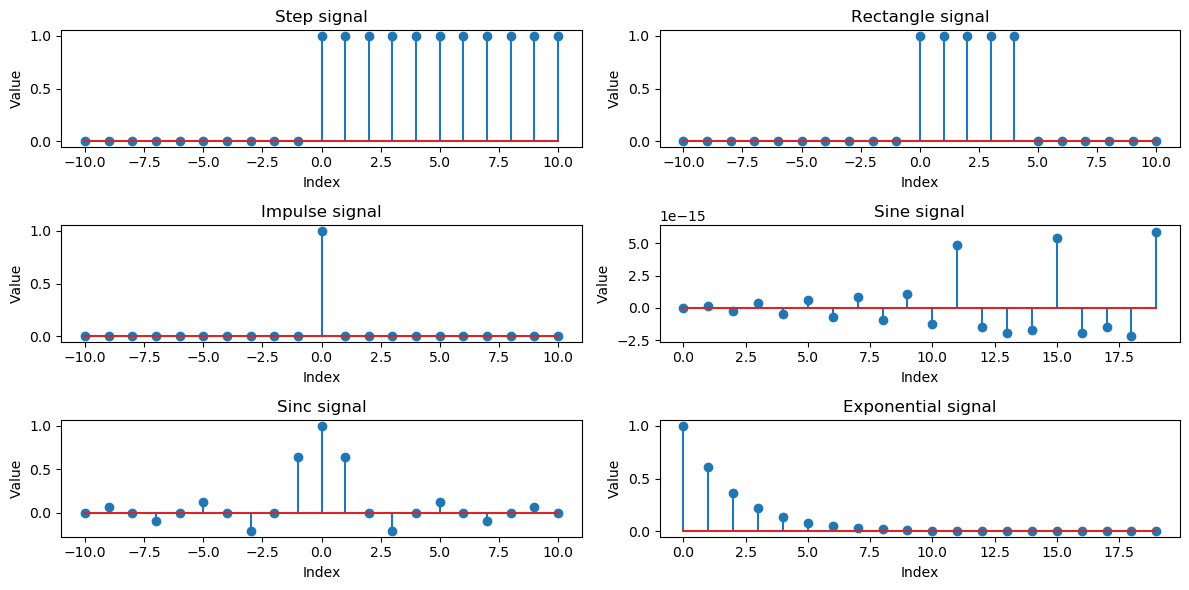

In [3]:
# Building signals in discrete time
n = np.arange(-10, 11, 1)
n_pos = np.arange(0, 20, 1)
T = 0.5

step = np.heaviside(n, 1)
retangle = np.heaviside(n, 1) - np.heaviside(n - 5, 1)
impulse = np.heaviside(n, 1) - np.heaviside(n - 1, 1)
sen = np.sin(2 * np.pi * n_pos * T)
sinc = np.sinc(n * T)
exp = np.exp(-n_pos * T)

# Plot all the signal separately
plt.figure(figsize=(12, 6))
plt.subplot(3, 2, 1)
plt.stem(n, step, use_line_collection=True)
plt.title('Step signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 2, 2)
plt.stem(n, retangle, use_line_collection=True)
plt.title('Rectangle signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 2, 3)
plt.stem(n, impulse, use_line_collection=True)
plt.title('Impulse signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 2, 4)
plt.stem(n_pos, sen, use_line_collection=True)
plt.title('Sine signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 2, 5)
plt.stem(n, sinc, use_line_collection=True)
plt.title('Sinc signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.subplot(3, 2, 6)
plt.stem(n_pos, exp, use_line_collection=True)
plt.title('Exponential signal')
plt.xlabel('Index')
plt.ylabel('Value')

plt.tight_layout()

### Questão 2  
Plot o círculo unitário no plano complexo ($e^{j\theta}$, $\theta ∈ [\theta, 2π])$.

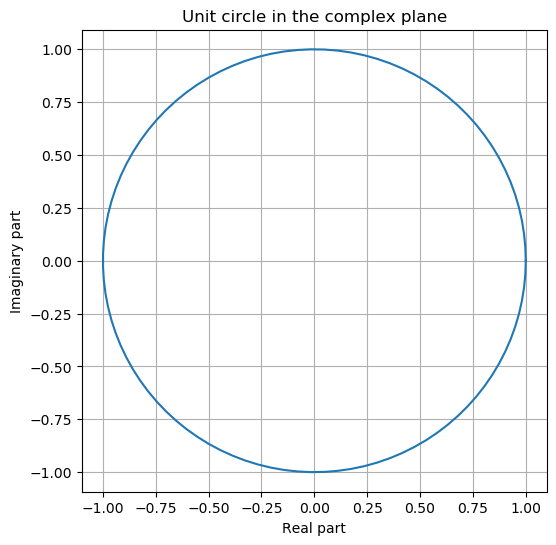

In [4]:
# Plot the unit circle in the complex plane
plt.figure(figsize=(6, 6))
theta = np.linspace(0, 2 * np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x, y)
plt.title('Unit circle in the complex plane')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid()
plt.axis('equal')
plt.show()

### Questão 4
Dado dois polinômios:

$p_{1}(x) = 5x³ + 3x² + 10x + 9$ e $p_{2}(x) = 15x² + 4x + 7$

Obtenha o produto $p_1(x)p_2(x)$ usando conv

Text(0, 0.5, 'y')

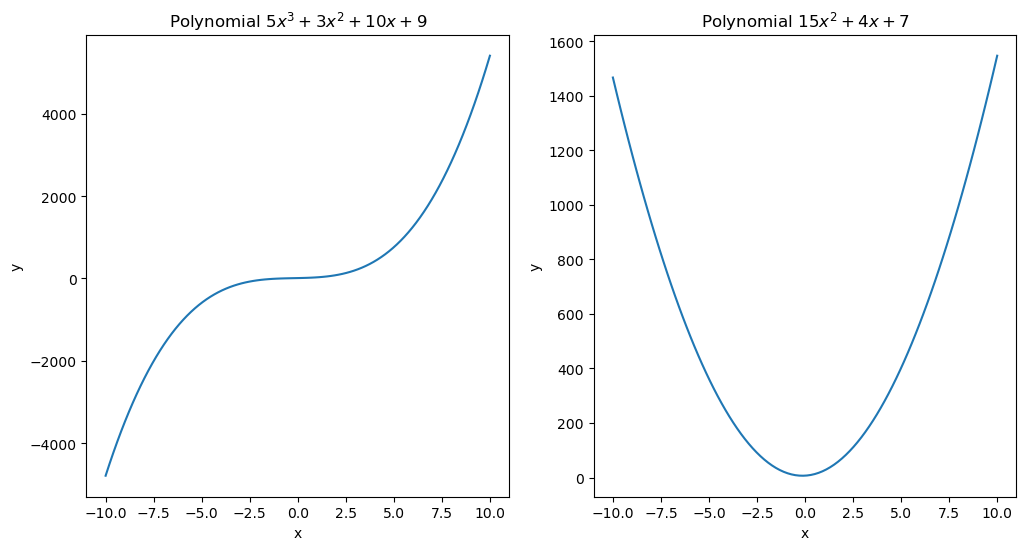

In [5]:
p1 = np.poly1d([5, 3, 10, 9])
p2 = np.poly1d([15, 4, 7])

# Plot the polynomials
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
x = np.linspace(-10, 10, 100)
plt.plot(x, p1(x))
plt.title('Polynomial $5x^3 + 3x^2 + 10x + 9$')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
x = np.linspace(-10, 10, 100)
plt.plot(x, p2(x))
plt.title('Polynomial $15x^2 + 4x + 7$')
plt.xlabel('x')
plt.ylabel('y')

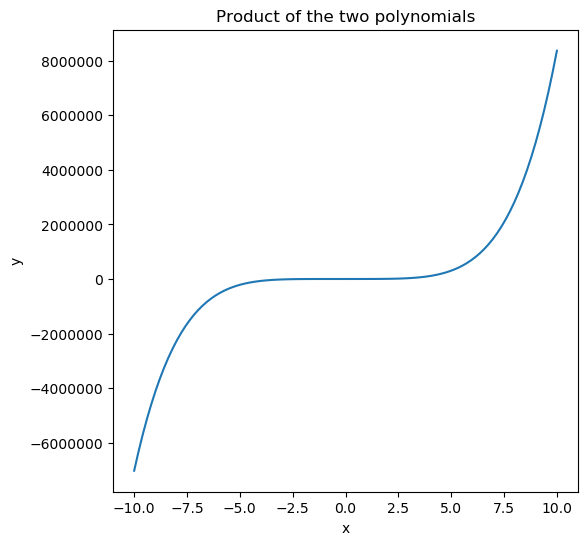

In [6]:
# Compute the product of the two polynomials
product = p1 * p2

# Plot the product of the two polynomials
plt.figure(figsize=(6, 6))
x = np.linspace(-10, 10, 100)
plt.plot(x, product(x))
plt.title('Product of the two polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Questão 5
Considere a função de transferência no domínio Z:

$G(z) = \frac{0.02268z + 0.02052}{(z - 0.7408)(z - 1)}$

(a) Obtenha a função de transferência em malha fechada com realimentação unitária (use tf e feedback).

(b) Suponha que um controle proporcional com ganho ($K$) seja aplicado ao sistema ($G(z)$). Obtenha os polos em malha fechada com realimentação negativa para ($K = 1 : 10$) e plote junto com o círculo unitário no plano complexo.

(c) Escolha 3 valores de ganho e plote a resposta ao degrau do sistema em malha fechada usando stairs.

In [7]:
# Define the coefficients of the transfer function in the Z-domain
numerator = [0.02268, 0.02052]
denominator = [1, -1.7408, 0.7408]

# Create the transfer function G(z)
Gz = ctrl.TransferFunction(numerator, denominator, True)

# Obtain the closed-loop transfer function T(z) with unit feedback
Tz = ctrl.feedback(Gz, 1)

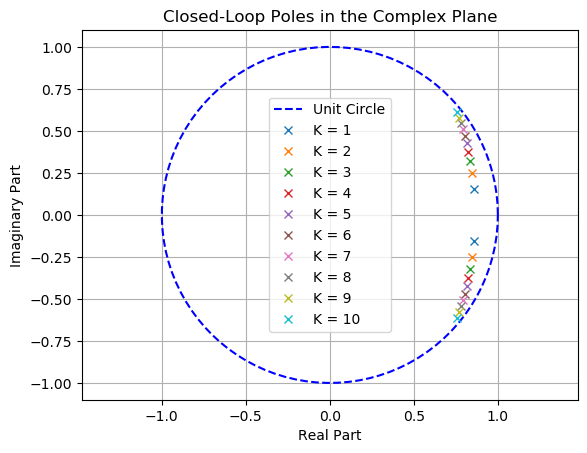

In [8]:
# Define the gain values K
K_values = np.arange(1, 11)

# Prepare the unit circle plot
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.exp(1j * theta)

plt.figure()
plt.plot(np.real(circle), np.imag(circle), 'b--', label='Unit Circle')

# Calculate the poles for each K and plot them
for K in K_values:
    Tz_K = ctrl.feedback(K * Gz, 1)
    poles = np.roots(Tz_K.den[0][0])
    plt.plot(np.real(poles), np.imag(poles), 'x', label=f'K = {K}')

plt.title('Closed-Loop Poles in the Complex Plane')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.grid()
plt.legend()
plt.axis('equal')
plt.show()

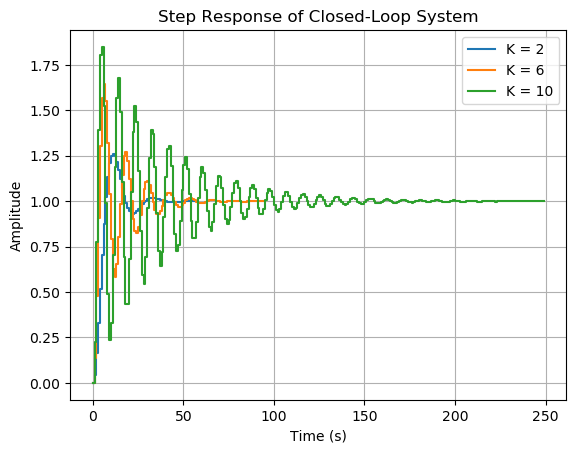

In [11]:
# Choose 3 values of K
selected_K = [2, 6, 10]

plt.figure()

# Calculate and plot the step response for each selected K
for K in selected_K:
    Tz_K = ctrl.feedback(K * Gz, 1)
    time, response = ctrl.step_response(Tz_K)
    plt.step(time, response, where='post', label=f'K = {K}')

plt.title('Step Response of Closed-Loop System')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()
plt.show()

### Questão 6
Considere o sistema em espaço de estados dado por:
$x(k + 1) = Ax(k) + Bu(k)$ em que:

Matriz **A**: $A = \begin{bmatrix}
1 & T \\
0 & 1 
\end{bmatrix}$

Matriz **B**: $B = \begin{bmatrix}
1 \\
0 
\end{bmatrix}$


e $T = 0.5s$ é o tempo de amostragem do sistema. Considere $x[0] = \begin{bmatrix} 0 & 1 \end{bmatrix}^T$ e $u(k) = \text{randn}$.

(a) Calcule $x(k)$ para $k = 0 : 500$ e plote o resultado usando stem.

(b) Calcule os autovalores de $A$ e plote no plano complexo junto com o círculo unitário.

/tmp/ipykernel_18956/3070142589.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x[0, :], linefmt='b-', markerfmt='bo', basefmt=' ', label='$x_1(k)$')
/tmp/ipykernel_18956/3070142589.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(x[1, :], linefmt='g-', markerfmt='go', basefmt=' ', label='$x_2(k)$')


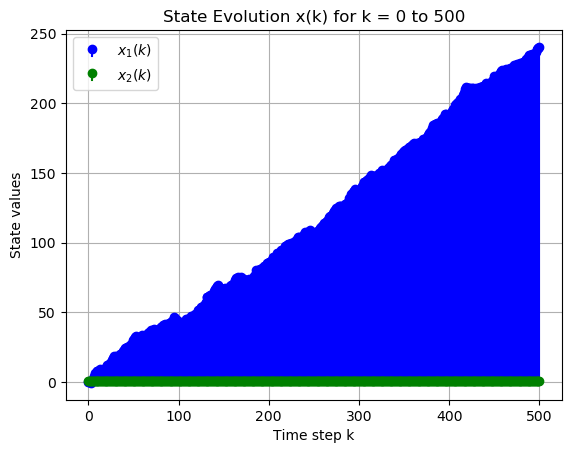

In [14]:
# Given matrices
T = 0.5  # Sampling time
A = np.array([[1, T], [0, 1]])  # State matrix
B = np.array([[1], [0]])  # Input matrix

# Initial conditions
x0 = np.array([[0], [1]])  # Initial state x[0]
u = np.random.randn(501, 1)  # Control input u(k) as random normal values

# Prepare to store x(k)
x = np.zeros((2, 501)) 
x[:, 0] = x0.flatten()  # Set initial state

# Compute x(k) for k = 0 to 500
for k in range(500):
    x[:, k + 1] = A @ x[:, k] + B.flatten() * u[k]

# Plot using stem plot
plt.figure()
plt.stem(x[0, :], linefmt='b-', markerfmt='bo', basefmt=' ', label='$x_1(k)$')
plt.stem(x[1, :], linefmt='g-', markerfmt='go', basefmt=' ', label='$x_2(k)$')
plt.title('State Evolution x(k) for k = 0 to 500')
plt.xlabel('Time step k')
plt.ylabel('State values')
plt.grid(True)
plt.legend()
plt.show()

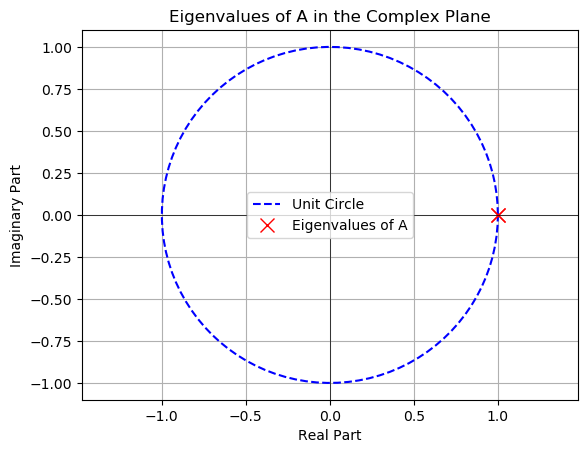

In [13]:
# Compute eigenvalues of A
eigenvalues, _ = np.linalg.eig(A)

# Prepare the unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.exp(1j * theta)  # Complex representation of the unit circle

# Plot eigenvalues and unit circle
plt.figure()
plt.plot(np.real(circle), np.imag(circle), 'b--', label='Unit Circle')
plt.plot(np.real(eigenvalues), np.imag(eigenvalues), 'rx', markersize=10, label='Eigenvalues of A')
plt.title('Eigenvalues of A in the Complex Plane')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()